# Simple Linear Regression

Regresi linear sederhana berfungsi untuk mengetahui hubungan sebab akibat atau mengetahui pengaruh variabel faktor penyebab (X) terhadap variabel akibatnya (Y). 

## 1 Import Libraries and Data

Pada studi kasus simple linear regression menggunakan data dengan variabel independen (X) yaitu Sr dan variabel dependen Aroma. Pada studi kasus kali ini, ingin diketahui sejauh mana pengaruh konsentrasi Strontium (Sr) terhadap rating Aroma?

variabel independen (X) = Sr, menyatakan besarnya konsentrasi bahan Strontium (Sr).<br>
variable dependen (y) = Aroma, rating aroma. <br>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [3]:
path='/content/gdrive/MyDrive/MBKM Data Scientist/Dataset - Meet 11 - DS/'
os.listdir(path)
datawine=pd.read_csv(path+'Data wine aroma.csv',usecols=['Aroma','Sr'])

In [4]:
datawine.head()

,Sr,Aroma
0,1.230,3.3
1,1.050,4.6
2,1.140,3.9
3,0.156,7.1
4,1.130,5.6


## 2 Exploratory Data Analysis (EDA) & Data Pre-Processing

### Summary Data

In [5]:
datawine.describe()

,Sr,Aroma
count,41.000000,41.000000
mean,0.800512,4.924390
std,0.445945,1.023177
min,0.156000,3.300000
25%,0.360000,4.300000
50%,0.898000,5.000000
75%,1.120000,5.500000
max,2.140000,7.700000


### Missing Value

Missing value adalah data yang hilang, atau nilai yang hilang, terjadi ketika tidak ada nilai data yang disimpan untuk variabel dalam pengamatan. Kita ingin melakukan identifikasi, apakah terdapat data yang missing atau tidak dalam observasi pengamatan.

In [6]:
datawine.isna().sum()

Sr       0
Aroma    0
dtype: int64

### Duplicated Data

Melakukan identifikasi, apakah terdapat data/observasi yang sama atau tidak, apabila ada data yang terduplikasi maka data duplikasi harus dihapus.

In [7]:
dup=datawine[datawine.duplicated(keep=False)]
dup

,Sr,Aroma
8,0.186,5.5
10,0.491,5.1
20,0.186,5.5
21,0.720,5.1
33,0.720,5.1
37,0.491,5.1


In [8]:
datawine.drop_duplicates(inplace=True)

In [9]:
datawine.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
34    False
35    False
36    False
38    False
39    False
40    False
dtype: bool

### Adjusting the type of variable

In [10]:
datawine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sr      38 non-null     float64
 1   Aroma   38 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


### Uji Asumsi sebelum Pemodelan Regresi Linier Sederhana

Asumsi yang perlu dipenuhi sebelum dilakukannya pemodelan regresi linier sederhana yaitu data berdistribusi normal (normalitas data) dan hubungan linier antara variabel prediktor (independen) dan variabel respon (dependen), karena variabel prediktornya ada 1 variabel maka tidak perlu uji asumsi gejala multikolinieritas.

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data. Uji Normalitas data perlu dilakukan juga untuk mengetahui keberadaan ourlier (data pencilan) dan normalitas data variabel respon (dependen) agar bisa diatasi.

#### Uji Nomalitas Data

<Axes: xlabel='Aroma', ylabel='Density'>

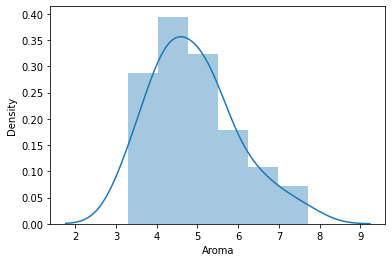

In [11]:
warnings.filterwarnings('ignore')
sns.distplot(datawine['Aroma'])

<Axes: >

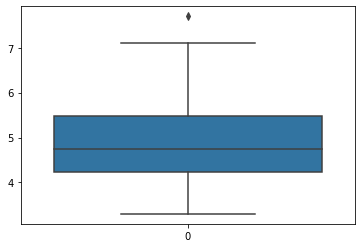

In [12]:
warnings.filterwarnings('ignore')
sns.boxplot(datawine['Aroma'])

<Axes: xlabel='Sr', ylabel='Density'>

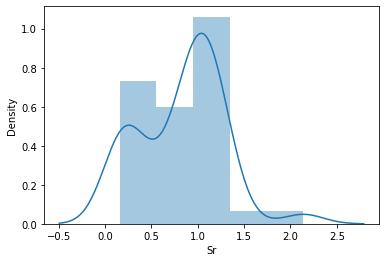

In [13]:
warnings.filterwarnings('ignore')
sns.distplot(datawine['Sr'])

In [48]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = datawine.columns

for i in column:
  stat, p = shapiro(datawine[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Terima H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.900, p=0.003
Tolak H0, Sr tidak berdistribusi normal
Statistics=0.959, p=0.182
Terima H0, Aroma berdistribusi normal


> Insight Grafik:
*   Histogram 
*   Boxplot 
*   Q-Q Plot

Pengecekan normalitas data secara visual tidak dapat ditarik kesimpulan sehingga perlu dilakukan pengujian hipotesis berikut:
<br>
<br>
Ho: Data berdistribusi Normal <br>
H1: Data tidak berdistribusi Normal
<br>
<br>
Bila p-value kurang dari 0.05 maka Ho Ditolak, berarti Data tidak berdistribusi Normal
Bila p-value lebih dari 0.05 maka Ho Diterima, berarti Data berdistribusi Normal.
<br>
<br>
Salah satu Uji Distribusi Normalitas Data yaitu Uji Shapiro-Wilk.

> Hasil pengujian menunjukkan bahwa ada data outliers

> Karena data outliers sedikit dan tidak mempengaruhi normalitas data, kita dapat mengabaikannya. Tetapi apabila normalitas data dipengaruhi oleh adanya outliers maka dapat dilakukan trimming/penghapusan data outliers, menambah data observasi, atau menggunakan metode Robust Regression. Selain itu, data outliers ini dalam pengaplikasian yang sesungguhnya perlu dianalisis ulang untuk dicari tau karakteristiknya lebih dalam.

#### Uji Linearitas Data

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

<Axes: xlabel='Aroma', ylabel='Sr'>

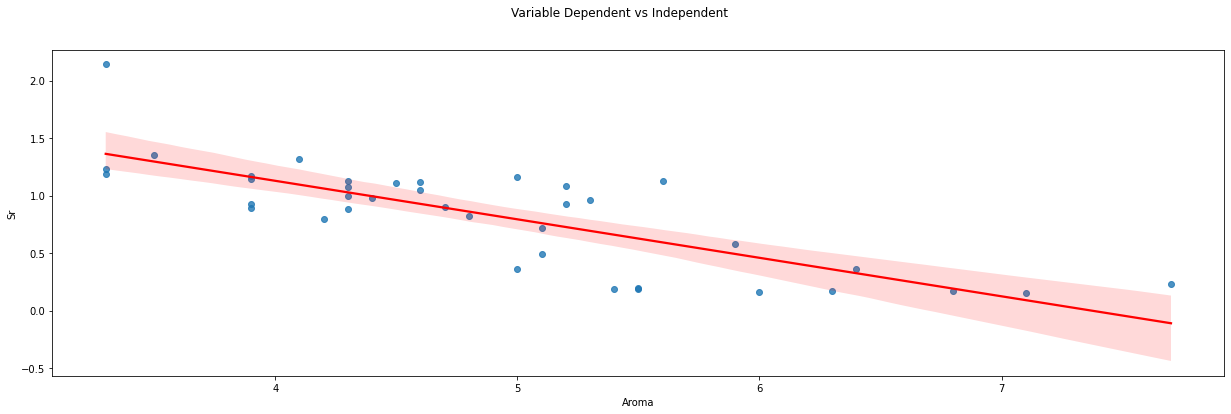

In [15]:
fig, axes = plt.subplots(figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=datawine["Aroma"], y=datawine["Sr"],lowess=False,line_kws={'color': 'red'})

## 3 Membangun Model Regresi

In [16]:
x=datawine['Sr'].values.reshape(-1,1)
y=datawine['Aroma'].values.reshape(-1,1)

In [17]:
x

array([[1.23 ],
       [1.05 ],
       [1.14 ],
       [0.156],
       [1.13 ],
       [1.12 ],
       [0.823],
       [0.229],
       [0.186],
       [1.07 ],
       [0.491],
       [2.14 ],
       [0.578],
       [0.885],
       [1.13 ],
       [0.995],
       [0.172],
       [0.898],
       [0.963],
       [0.36 ],
       [0.72 ],
       [1.32 ],
       [0.164],
       [0.192],
       [1.17 ],
       [0.168],
       [0.889],
       [1.11 ],
       [0.927],
       [1.35 ],
       [1.19 ],
       [0.358],
       [0.794],
       [0.184],
       [0.975],
       [0.927],
       [1.16 ],
       [1.08 ]])

In [18]:
y

array([[3.3],
       [4.6],
       [3.9],
       [7.1],
       [5.6],
       [4.6],
       [4.8],
       [7.7],
       [5.5],
       [4.3],
       [5.1],
       [3.3],
       [5.9],
       [4.3],
       [4.3],
       [4.3],
       [6.3],
       [4.7],
       [5.3],
       [6.4],
       [5.1],
       [4.1],
       [6. ],
       [5.5],
       [3.9],
       [6.8],
       [3.9],
       [4.5],
       [5.2],
       [3.5],
       [3.3],
       [5. ],
       [4.2],
       [5.4],
       [4.4],
       [3.9],
       [5. ],
       [5.2]])

### Membangun Model dengan Sklearn

In [19]:
LR = LinearRegression()
results=LR.fit(x, y)

In [20]:
print(LR.intercept_)
print(LR.intercept_[0])
print(round(LR.intercept_[0],4))


[6.44129785]
6.441297846959686
6.4413


In [21]:
print(LR.coef_)
print(LR.coef_[0][0])
print(round(LR.coef_[0][0],4))

[[-1.86384032]]
-1.8638403190067487
-1.8638


In [22]:
print("Intercept Linear Regression model : ", round(LR.intercept_[0],4))
print("Coef Linear Regression model : ", round(LR.coef_[0][0],4))

Intercept Linear Regression model :  6.4413
Coef Linear Regression model :  -1.8638


In [23]:
prediction_train = LR.predict(x)
df_linreg_train = pd.DataFrame(x, columns=["Sr"])
df_linreg_train["Aroma"] = y
df_linreg_train["prediction_Aroma"] = prediction_train
df_linreg_train.head()


,Sr,Aroma,prediction_Aroma
0,1.230,3.3,4.148774
1,1.050,4.6,4.484266
2,1.140,3.9,4.316520
3,0.156,7.1,6.150539
4,1.130,5.6,4.335158


#### Asumsi Analisis Regresi

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

**Asumsi Residual Distribusi Normal**

In [24]:
df_linreg_train["residual"] = y - prediction_train
df_linreg_train.head()

,Sr,Aroma,prediction_Aroma,residual
0,1.230,3.3,4.148774,-0.848774
1,1.050,4.6,4.484266,0.115734
2,1.140,3.9,4.316520,-0.416520
3,0.156,7.1,6.150539,0.949461
4,1.130,5.6,4.335158,1.264842


<Axes: xlabel='residual', ylabel='Density'>

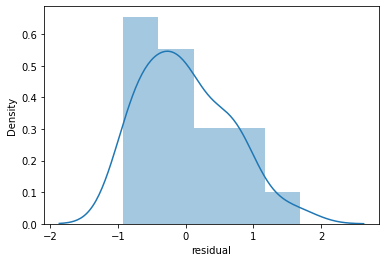

In [25]:
sns.distplot(df_linreg_train['residual'])

In [49]:
stat, p = shapiro(df_linreg_train['residual'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Terima H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.955, p=0.132
Terima H0, residual berdistribusi normal


**Asumsi No autokorelasi**


Uji Durbin watson akan menghasilkan nilai Durbin Watson (DW) yang nantinya akan dibandingkan dengan dua (2) nilai Durbin Watson Tabel, yaitu Durbin Upper (DU) dan Durbin Lower DL). Dikatakan tidak terdapat autokorelasi jika nilai DW > DU dan (4-DW) > DU atau bisa dinotasikan juga sebagai berikut: (4-DW) > DU < DW.


In [27]:
statsmodels.stats.stattools.durbin_watson(df_linreg_train['residual'], axis=0)

1.6860867086459665

**Asumsi Homoskedastisitas**

Uji Homoskedastisiitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain.


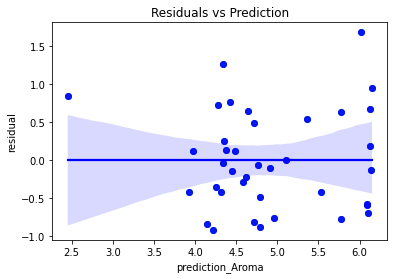

In [28]:
homosk = plt.scatter(df_linreg_train['prediction_Aroma'], df_linreg_train["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
homosk = sns.regplot(data=df_linreg_train,x=df_linreg_train['prediction_Aroma'],y=df_linreg_train["residual"],color='blue')
homosk = plt.title('Residuals vs Prediction')

#### Evaluasi Model

In [29]:
print('R-square predicted training:', metrics.r2_score(df_linreg_train['Aroma'], df_linreg_train['prediction_Aroma']))

R-square predicted training: 0.6240808118800623


In [30]:
print('MSE predicted training:', metrics.mean_squared_error(df_linreg_train['Aroma'], df_linreg_train['prediction_Aroma']))

MSE predicted training: 0.4101476194592795


### Membangun model dengan package Statsmodels

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [32]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  26
Ukuran X test  12
Ukuran y train  26
Ukuran y test  12


In [33]:
Input = sm.add_constant(X_train)

In [34]:
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     34.93
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           4.25e-06
Time:                        14:09:46   Log-Likelihood:                -25.925
No. Observations:                  26   AIC:                             55.85
Df Residuals:                      24   BIC:                             58.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8698      0.358     19.191      0.0

In [36]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.5927211425133366
adjusted coefficient of determination: 0.575751190118059
regression coefficients: [ 6.86980395 -2.25201531]


In [37]:
list_columns = []

for i in datawine.columns:
  if i != "Aroma":
    list_columns.append(i)

In [38]:
list_columns

['Sr']

In [39]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_aroma"] = y_test
df_statsmod["prediction_aroma"] = prediction_1
df_statsmod.head()

,Sr,actual_aroma,prediction_aroma
0,0.164,6.0,6.500473
1,1.350,3.5,3.829583
2,0.172,6.3,6.482457
3,0.995,4.3,4.629049
4,2.140,3.3,2.050491


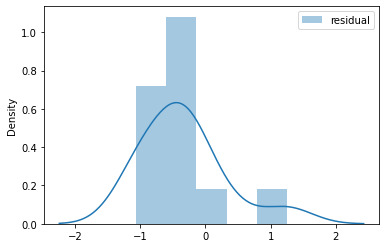

In [40]:
residual1 = df_statsmod['actual_aroma'] - df_statsmod['prediction_aroma']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [41]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Terima H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.880, p=0.089
Terima H0, residual berdistribusi normal


In [42]:
df_statsmod["residual"] = residual1
df_statsmod

,Sr,actual_aroma,prediction_aroma,residual
0,0.164,6.0,6.500473,-0.500473
1,1.350,3.5,3.829583,-0.329583
2,0.172,6.3,6.482457,-0.182457
3,0.995,4.3,4.629049,-0.329049
4,2.140,3.3,2.050491,1.249509
5,0.720,5.1,5.248353,-0.148353
6,0.889,3.9,4.867762,-0.967762
7,0.491,5.1,5.764064,-0.664064
8,0.168,6.8,6.491465,0.308535
9,1.140,3.9,4.302507,-0.402507


In [43]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

1.7407519101370441

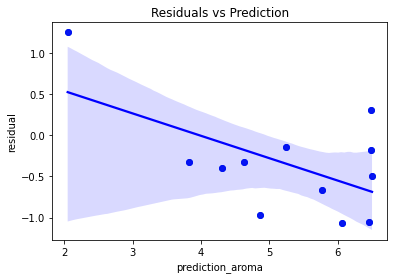

In [44]:
homosk = plt.scatter(df_statsmod['prediction_aroma'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
homosk = sns.regplot(data=df_statsmod,x=df_statsmod['prediction_aroma'],y=df_statsmod["residual"],color='blue')
homosk = plt.title('Residuals vs Prediction')

### Uji Partial & Serentak Analisis Regresi

Uji Parameter T-test  memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [45]:
t_test_const, t_test_X1 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)

T-test score const:  19.19072553832758
T-test score X1:  -5.909964843977096


In [46]:
p_value_const, p_value_X1 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)

P-value const:  4.563171927935421e-16
P-value X1:  4.253412691206547e-06


Diperoleh dari output diatas, bahwa P-value ketiga variabel kurang dari 0,05 sehingga Hypothesis null ditolak dan dapat disimpulkan, bahwa variabel Sr independen (X) memberikan pengaruh secara signifikan pada variabel dependen Aroma (Y).

Uji kelayakan model F-test memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak

In [47]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  34.92768445704525
P-value :  4.253412691206519e-06
Tolak H0


Dari output diatas, diperoleh p-value kurang dari 0,05 sehingga hypothesis null ditolak dan dapat disimpulkan bahwa model regresi dari variabel independen Sr dan variabel dependen Aroma (Y) layak digunakan.